# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data",names=colnames)
pima_df.head(100)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df1=pima_df
pima_df1.sample(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
22,7,196,90,0,0,39.8,0.451,41,1
509,8,120,78,0,0,25.0,0.409,64,0
424,8,151,78,32,210,42.9,0.516,36,1
482,4,85,58,22,49,27.8,0.306,28,0
192,7,159,66,0,0,30.4,0.383,36,1
739,1,102,74,0,0,39.5,0.293,42,1
577,2,118,80,0,0,42.9,0.693,21,1
724,1,111,94,0,0,32.8,0.265,45,0
293,1,128,48,45,194,40.5,0.613,24,1
459,9,134,74,33,60,25.9,0.460,81,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
print(pima_df1.dtypes)
print(pima_df1.shape)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
(768, 9)


In [6]:
pima_df.median()

preg       3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [5]:
#(pima_df == 0).all
#pima_df= pima_df.replace(0,czzCCCççc)
#pima_df
pima_df1= pima_df1.replace(0,pima_df.median())
pima_df1

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [ ]:
preg       3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      31.2500
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

# Q5 Print the descriptive statistics of each & every column using describe() function

In [9]:
pima_df1.describe()
#pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

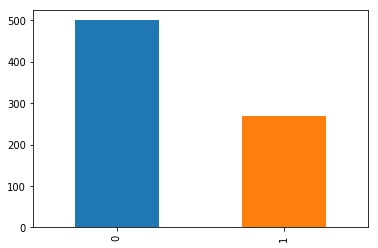

In [14]:
#pima_df1.groupby(["preg"]).count()
pima_df1['class'].value_counts().head(10).plot.bar()

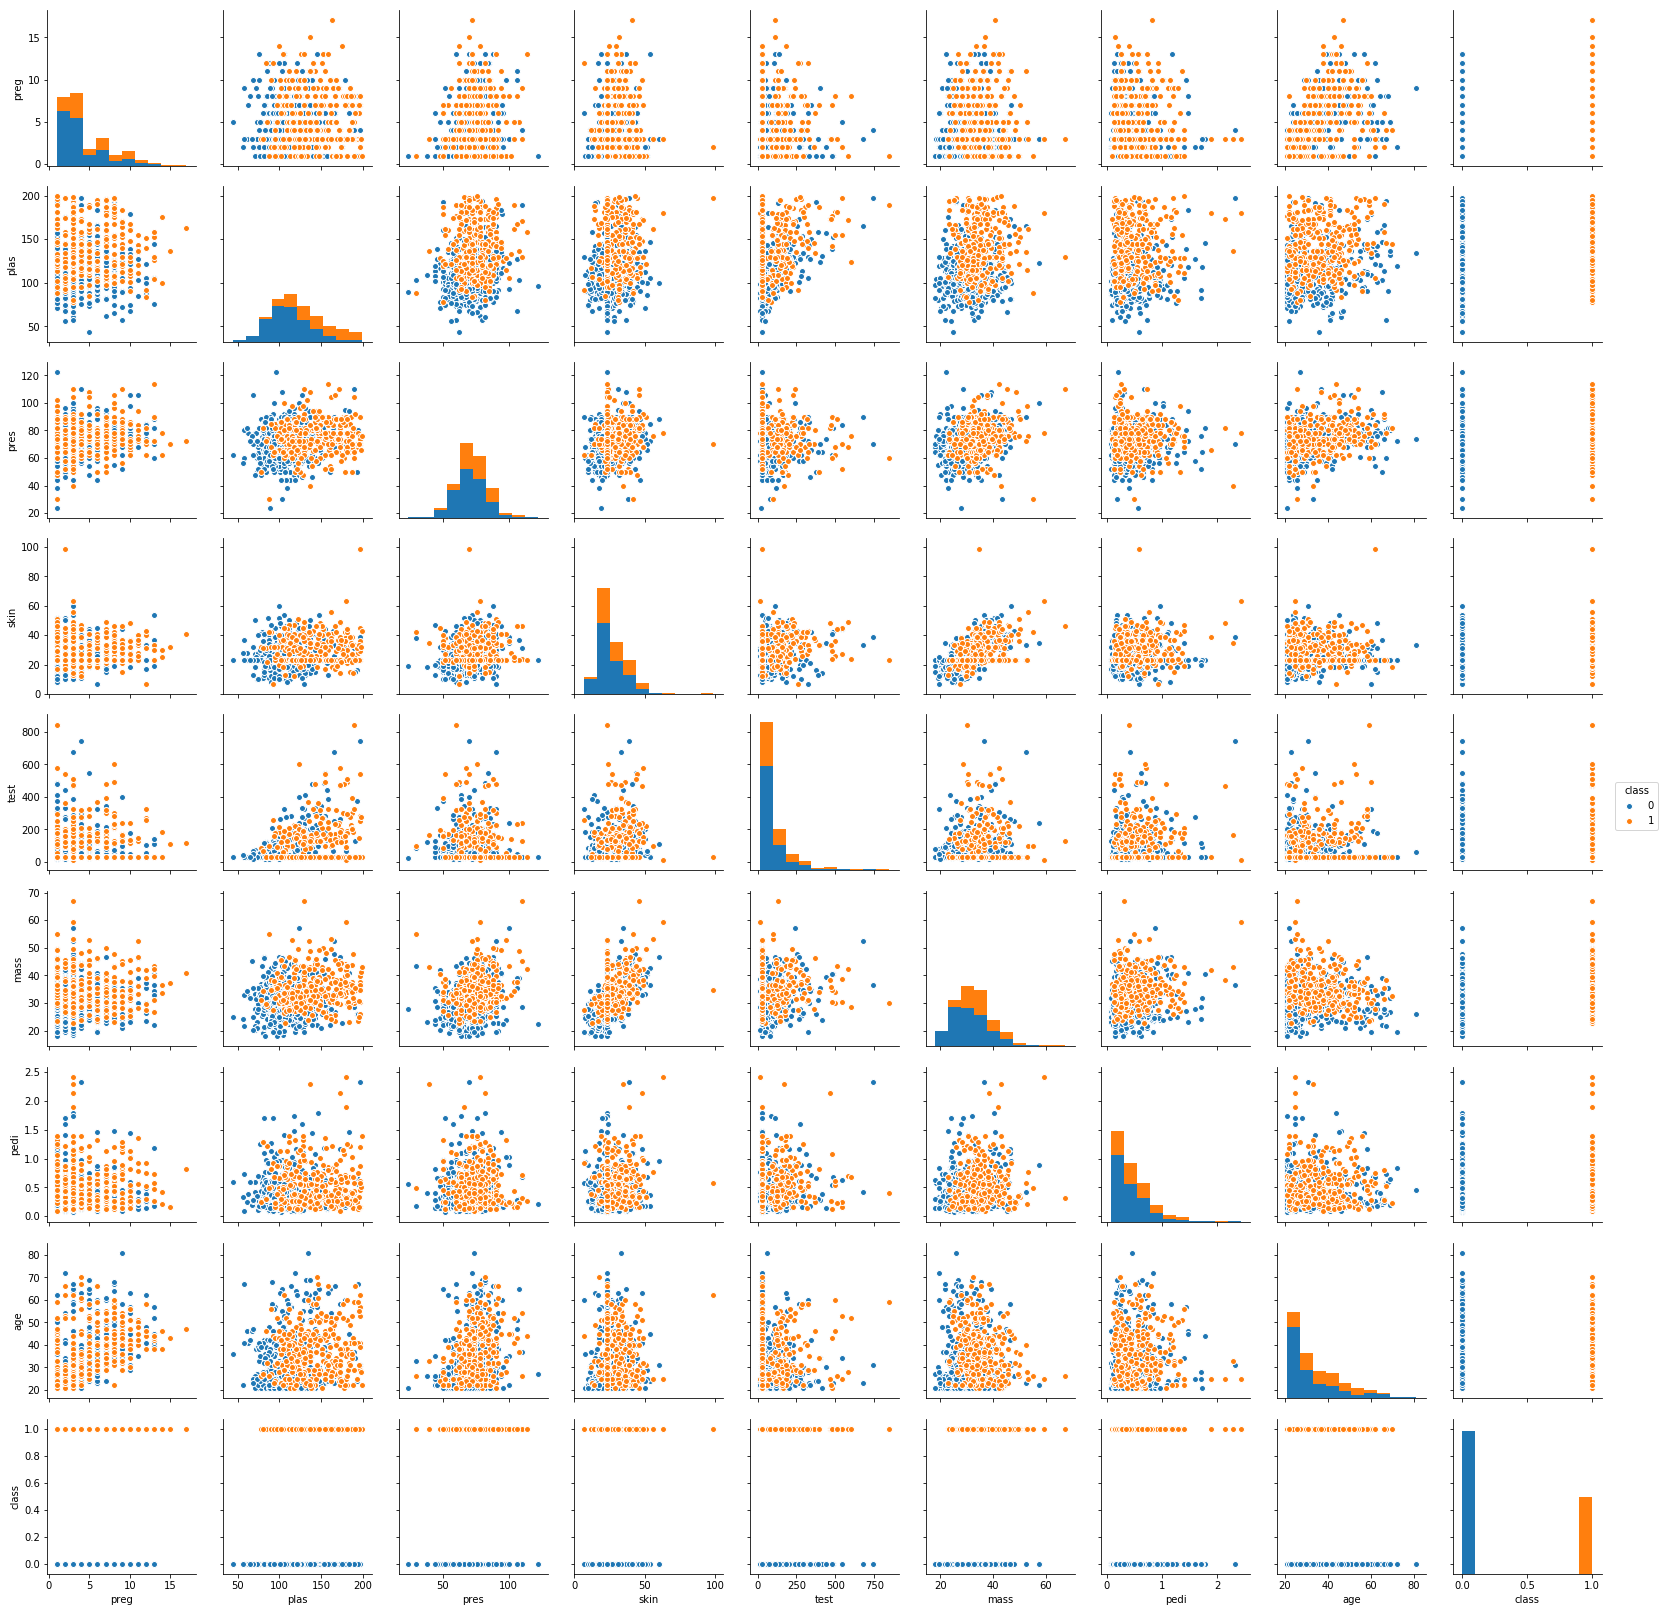

In [17]:
sns.pairplot(pima_df1, hue = "class")

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

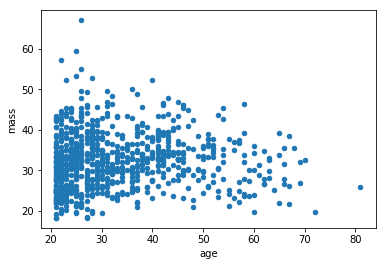

In [21]:
pima_df1.plot.scatter(x='age', y='mass')

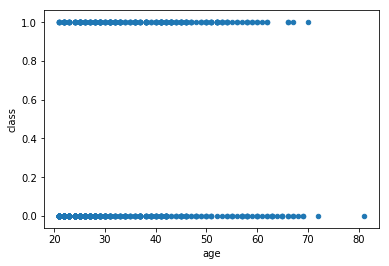

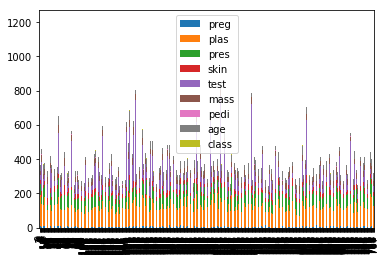

In [24]:
pima_df1.plot.scatter(x='age', y='class')
pima_df1.plot.bar(stacked=True)

Using bivariate analysis check for useful relationships between attributes and attributes and the target class



# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
plas,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
pres,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


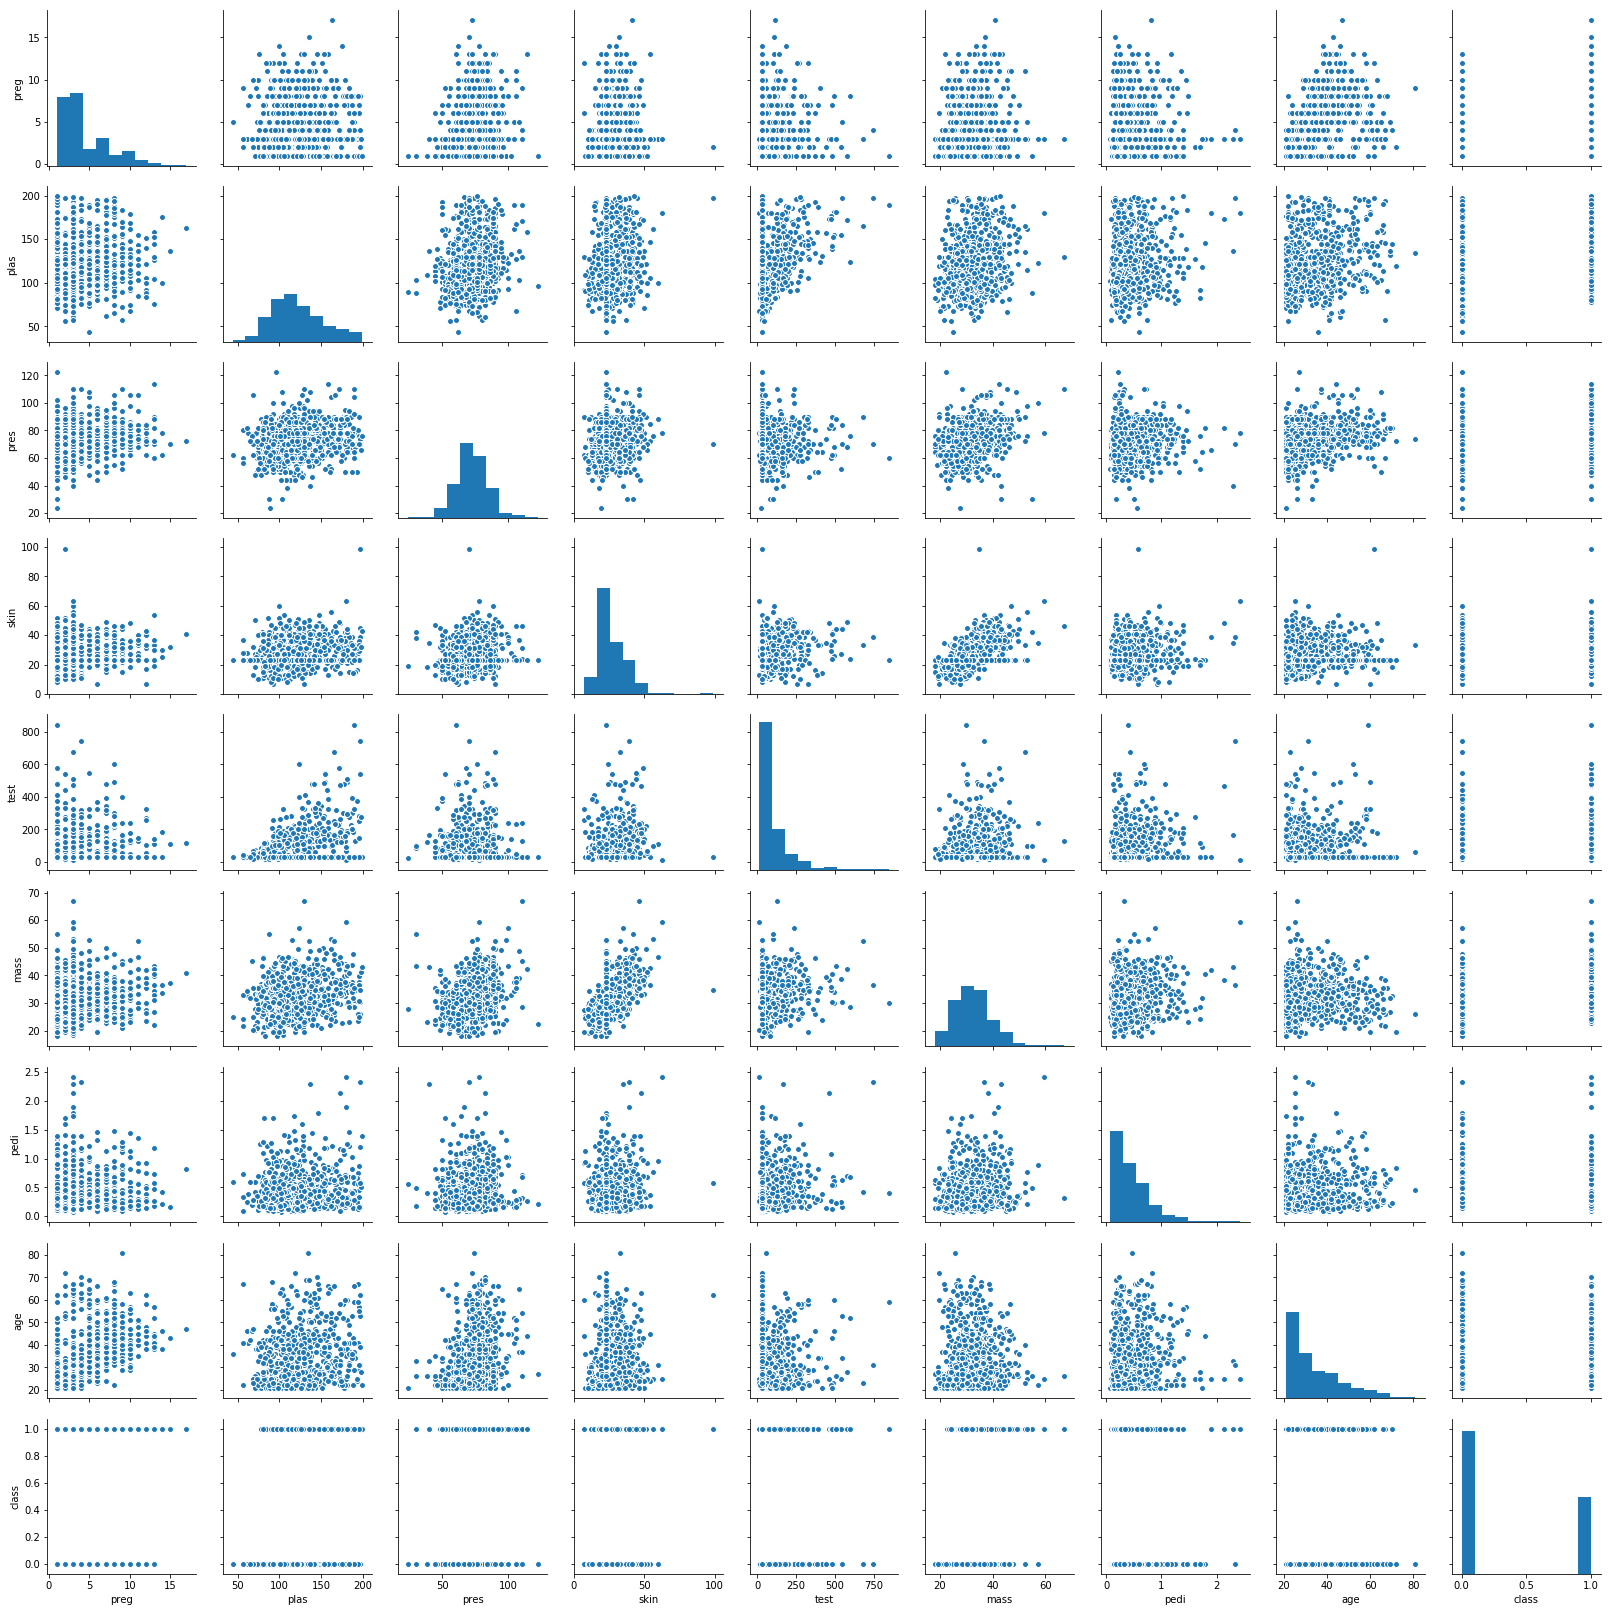

In [25]:
sns.pairplot(pima_df1)
pima_df1.corr()
# Data is postively correlated and the 

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [34]:
array = pima_df1.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [36]:
X_train = pima_df.head(538)
X_test = pima_df.tail(230)

y_train = X_train.pop("class")
y_test = X_test.pop("class")
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [41]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test,y_test))
y_predict = dt_model.predict(X_test)
print("CM",metrics.confusion_matrix(y_test, y_predict))

1.0
0.6956521739130435
CM [[116  35]
 [ 35  44]]


Print the feature importance of the decision model - Optional

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, Y)
tree.feature_importances_

array([0.0630304 , 0.34321102, 0.0977125 , 0.06773838, 0.07511458,
       0.23054615, 0.12264697])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.808695652173913
[[138  13]
 [ 31  48]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
# AdaBoostClassifier( n_estimators=0)
abcl = abcl.fit(X_train, y_train)

In [49]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.6956521739130435
[[113  38]
 [ 32  47]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [51]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

In [52]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.782608695652174
[[133  18]
 [ 32  47]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100)
gbcl = gbcl.fit(X_train, y_train)

In [54]:
y_predict = gbcl.predict(X_test)

In [55]:
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8
[[135  16]
 [ 30  49]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [58]:
#from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#eclf1 = VotingClassifier(voting='hard')
#eclf1 = eclf1.fit(X_train, y_train)
#print(eclf1.predict(X_test))